# PROYECTO DE APRENDIZAJE SUPERVISADO

En este proyecto vamos a utilizar un dataset con información sobre los empleados de una empresa para experimentar con varias técnicas de aprendizaje supervisado.

### Significado y contenido de las variables.

* **satisfaction_level**: Es el nivel de satisfacción de los empleados, que va de 0-1.

* **last_evaluation**: Se evalúa el desempeño por parte del empleador, el cual también va de 0-1..

* **number_projects**: ¿Cual es el  número de proyectos asignados a un empleado?

* **average_monthly_hours**: ¿Cuántas horas promedio trabaja un empleado en un mes?

* **time_spent_company**: significa experiencia del empleado. Número de años de permanencia de un empleado en la empresa.

* **work_accident**: si un empleado ha tenido un accidente de trabajo o no.

* **promotion_last_5years**: si un empleado ha tenido una promoción en los últimos 5 años o no..

* **sales**: departamento/división a la que pertenece el empleado.

* **Salary**: Nivel salarial del empleado en los niveles:low, medium and high.

* **left**: Si el empleado ha dejado la empresa o no. (0: No, 1: Sí)

Observemos que la variable con denominación "sales" no expresa adecuadamente el contenido de la variable, así que posteriormente la vamos a denominar `department`.

# Fase 1: Carga de datos y análisis descriptivo.

Primero nos disponemos a cargar los datos del dataset y a realizar un análisis descriptivo. Antes de iniciar la construcción de cualquier modelo de Machine Learning, es primordial realizar un análisis que nos permita familiarizarnos con los datos y extraer las primeras conclusiones de los mismos.


In [2]:
#Importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

In [3]:
#Descargamos los ficheros de Google Drive
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1ZwgdmI525zInDh1SQVm7FZt8kWxfrvOK' -O 'Rotacion_empleados.csv'

--2024-08-19 20:40:13--  https://drive.google.com/uc?export=download&id=1ZwgdmI525zInDh1SQVm7FZt8kWxfrvOK
Resolving drive.google.com (drive.google.com)... 173.194.210.101, 173.194.210.138, 173.194.210.102, ...
Connecting to drive.google.com (drive.google.com)|173.194.210.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1ZwgdmI525zInDh1SQVm7FZt8kWxfrvOK&export=download [following]
--2024-08-19 20:40:13--  https://drive.usercontent.google.com/download?id=1ZwgdmI525zInDh1SQVm7FZt8kWxfrvOK&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.139.132, 2607:f8b0:400c:c05::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.139.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 551779 (539K) [application/octet-stream]
Saving to: ‘Rotacion_empleados.csv’

Rotacion_empleados. 100%[===================>] 538.85

In [4]:
#Leemos el conjunto de datos
datos = pd.read_csv("Rotacion_empleados.csv")

#Visulaizamos las primeras filas
datos.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
#Cambiamos de nombre sales y le ponemos department
datos.rename(columns={'sales': 'department'}, inplace=True)
datos.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
#Observamos la información sobre las variables que contiene este data set
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Vemos el tipo de dato de cada columna y que el dataset no contiene ningun valor nulo.

Seguidamente vamos a comrpobar si estamos ante un problema de clases desbalanceadas mediante un gráfico de barras que nos muestre la distribución de la variable a predecir (left).

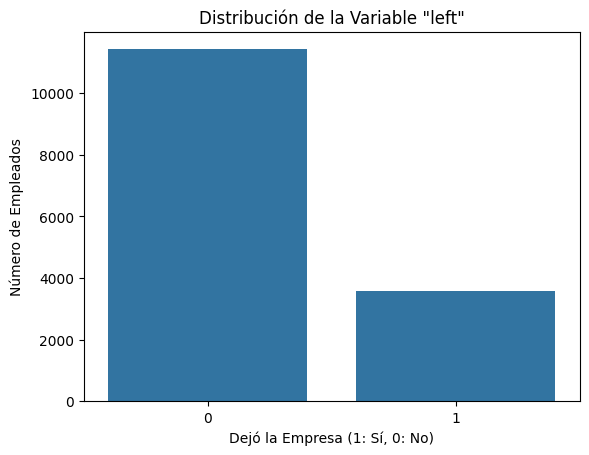

In [7]:
sns.countplot(x='left', data=datos)
plt.title('Distribución de la Variable "left"')
plt.xlabel('Dejó la Empresa (1: Sí, 0: No)')
plt.ylabel('Número de Empleados')
plt.show()

Cómo se puede observar en el gráfico anterior vemos que efectivamente la clase objetivo está desbalanceada ya que la clase 0 tiene una proporción significativamente mayor que la clase 1.

Conscientes de este desequilibrio en la variable objetivo, experimentaremos cómo reacciona el modelo si dejemos las clases desbalanceadas o si usamos alguna técnica de balanceo.

##Interacción atributos y target

Vamos a realizar una exploración un poco más exaustiva para entender mejor el dataset observando cómo se distribuye la variable a predecir (`left`) en relación a cada atributo mediante los diagramas de barras siguientes.

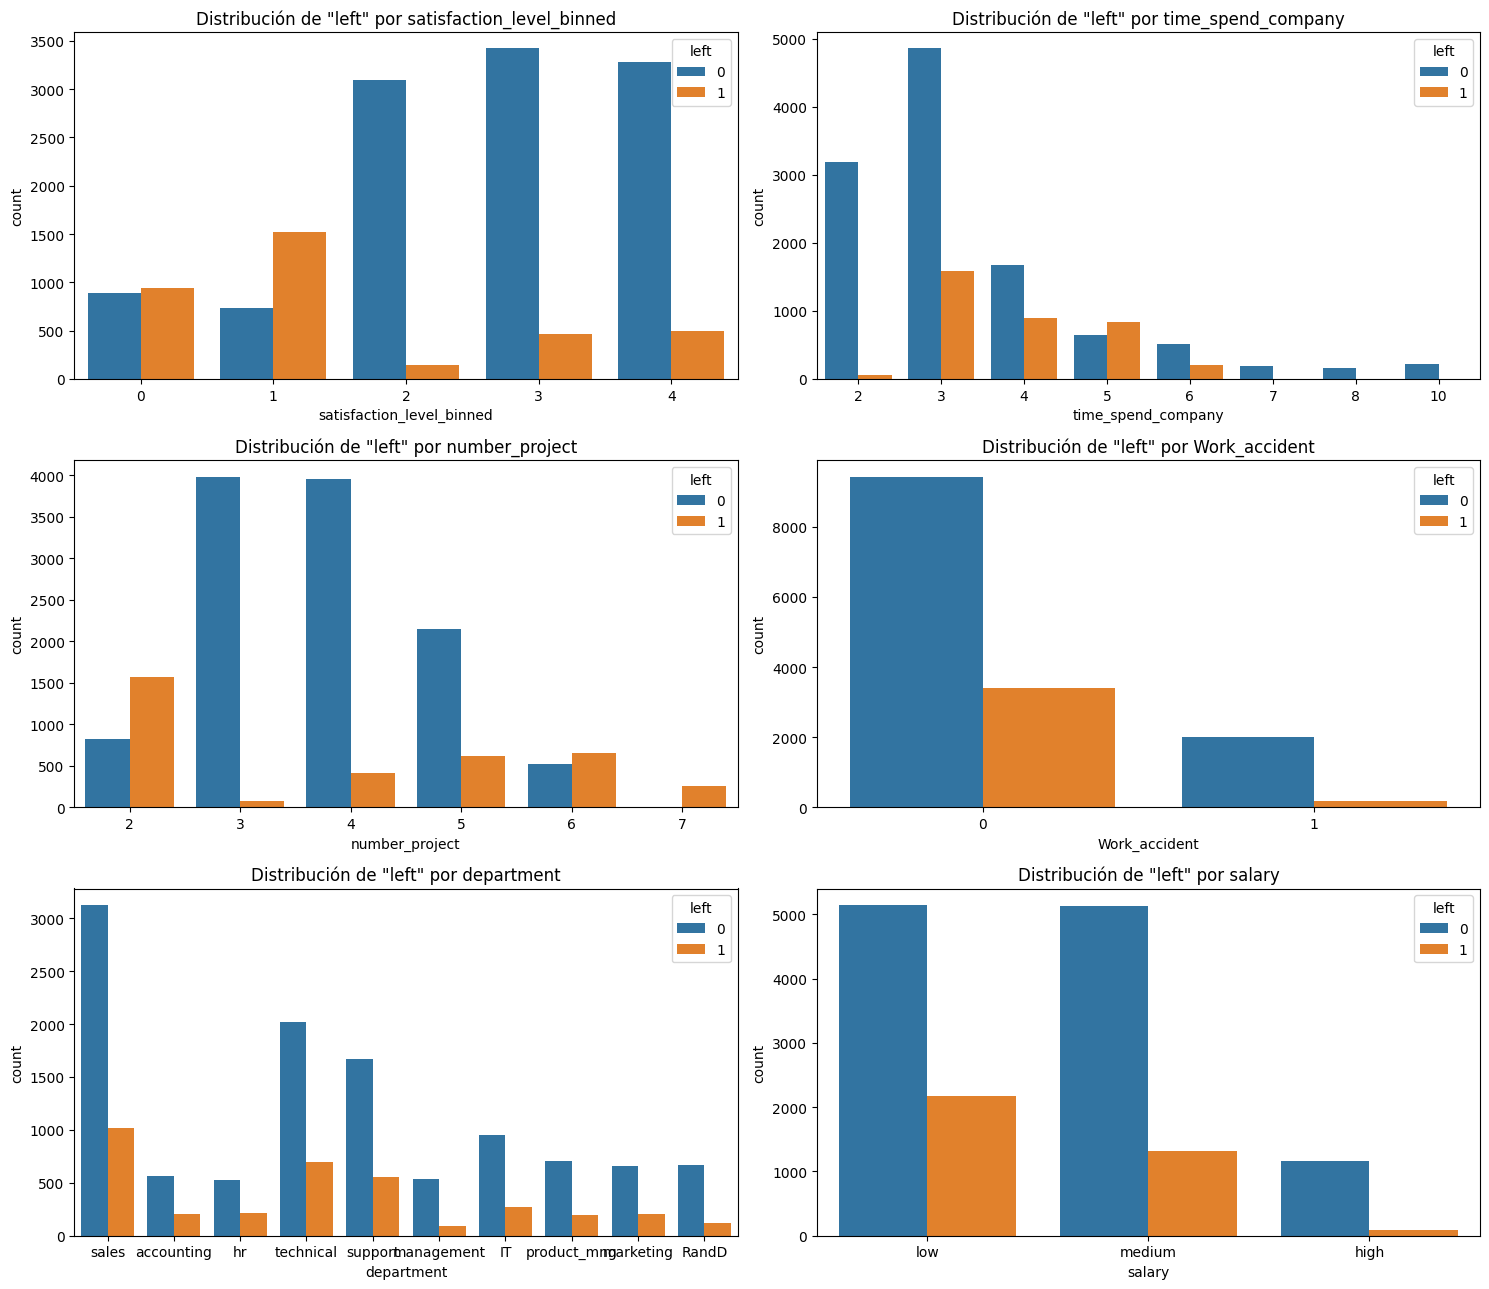

In [8]:
# Creamos otra columna con rangos de valores de la variable satisfaction_level
datos['satisfaction_level_binned'] = pd.cut(datos['satisfaction_level'], bins=5, labels=False)
datos['satisfaction_level_binned'] = datos['satisfaction_level_binned'].astype('category')

# Listamos los atributos categóricos que queremos visualizar
categorical_attributes = ["satisfaction_level_binned", "time_spend_company", "number_project",  "Work_accident", "department", "salary"]

# Configuramos los subgráficos:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 13))

# Iteramos sobre la lista de los atributos categóricos y creamos los gráficos de barras:
for i, attribute in enumerate(categorical_attributes):
    row, col = i // 2, i % 2
    sns.countplot(x=attribute, hue='left', data=datos, ax=axes[row, col])
    axes[row, col].set_title(f'Distribución de "left" por {attribute}')

plt.tight_layout()
plt.show()


A partir de las gráficas anteriores, podemos obtener mucha información sobre cómo interactúa la variable a predecir con las variables explicativas:

1. En la primera gráfica, vemos que el nivel de satisfacción de los empleados define en gran medida los que se quedan o los que se van, ya que la proporción de los que se van es muy grande para valores de satisfacción bajo.
2. En cuanto al tiempo pasado en la empresa, vemos que la gran mayoría de los empleados que dejaron la posición lo hicieron en un rango de 3 a 6 años, con una cierta correlación negativa.
3. Observando la tercera gráfica, identificamos que los empleados con un número muy bajo de proyectos (2) o muy alto (5, 6 o 7) tienen una mayor tendencia a dejar la empresa.
4. La cuarta gráfica nos muestra que no hay aparente relación entre accidentes laborales y dejar la empresa.
5. La relación entre los empleados que dejaron el trabajo y el departamento del que formaban parte tampoco parece ser muy determinante. La proporción parece mantenerse relativamente constante, siendo ligeramente mayor para los empleados de Recursos Humanos (`HR`) y Accounting, y menor para los directivos (`Management`).
6. Finalmente, podemos observar que cuanto más bajo es el salario de los empleados, mayor es la tendencia a irse de la empresa, ya que hay una correlación negativa entre el salario recibido y la proporción de empleados que se marchan.

# Fase 2: Análisis predictivo


## Preparación de los datos

Tal y cómo vimos anteriormente al comrpobar los tipos de los datos del dataset, podemos observar que hay algunas variables que son de tipo categórico con categorías en formato literal (`object`).

In [9]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   satisfaction_level         14999 non-null  float64 
 1   last_evaluation            14999 non-null  float64 
 2   number_project             14999 non-null  int64   
 3   average_montly_hours       14999 non-null  int64   
 4   time_spend_company         14999 non-null  int64   
 5   Work_accident              14999 non-null  int64   
 6   left                       14999 non-null  int64   
 7   promotion_last_5years      14999 non-null  int64   
 8   department                 14999 non-null  object  
 9   salary                     14999 non-null  object  
 10  satisfaction_level_binned  14999 non-null  category
dtypes: category(1), float64(2), int64(6), object(2)
memory usage: 1.2+ MB


Debido a que hay modelos que no admiten esta codificación vamos a transformalas:

*   Para la variable `salary` codificamos sus categorias de la siguiente manera: low = 0, medium = 1 y high = 2.
*   Para la variable `department` la transformamos en variables dummies.

In [10]:
# Definir el mapeo de codificación
salary_clasification = {'low': 0, 'medium': 1, 'high': 2}

# Aplicar el mapeo a la columna 'salary'
datos['salary'] = datos['salary'].map(salary_clasification)

datos.salary.head()

,salary
0,0
1,1
2,1
3,0
4,0


In [11]:
# Creamos variables dummy para 'department'
department_dummies = pd.get_dummies(datos['department'], prefix='department', drop_first=True)

# Concatenamos las variables dummy al DataFrame original
datos = pd.concat([datos, department_dummies], axis=1)

# Eliminamos la columna original 'department' si es necesario
datos = datos.drop('department', axis=1)

#Visualizamos las columnas creadas
datos.filter(like='department').head()

,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,True,False,False


A continuación vamos a dividir los datos en un conjunto de datos de entrenamiento (80%) y uno de validación (20%).

Utilizaremos la función `train_test_split` de scikit-learn con el parámtero parámetro `stratify=y` para garantizar que la proporción de observaciones de la variable `left` se mantenga tanto en los dos conjuntos de datos.

In [12]:
from sklearn.model_selection import train_test_split

# Supongamos que 'X' son tus características y 'y' es la variable objetivo 'left'

X = datos.loc[:, datos.columns != 'left']
y = datos['left']

# Dividir el conjunto de datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)

# Verificar las formas de los conjuntos resultantes
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)

Forma de X_train: (11999, 18)
Forma de X_test: (3000, 18)
Forma de y_train: (11999,)
Forma de y_test: (3000,)


# Fase 3: Implementación de los modelos

#### Modelo 1 - Regresión logística

Primero vamoms a probar con la regresión logística, la cual estima la probabilidad de que una instancia pertenezca a una clase usando una función sigmoide. Por lo tanto es útil para problemas binarios donde la relación entre características y clases es lineal.

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

#Creamos el modelo y lo entrenamos
classifier = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
classifier.fit(X_train, y_train)

#Realizamos las predicciones sobre el conjunto de prueba
y_pred = classifier.predict(X_test)

#Visualizamos los resultados
print(f' Classification report:\n\n {classification_report(y_test, y_pred)}')
print('\n'f'La matriz de confusión es: \n\n {confusion_matrix(y_test,y_pred)}')

 Classification report:

               precision    recall  f1-score   support

           0       0.84      0.93      0.88      2286
           1       0.64      0.43      0.52       714

    accuracy                           0.81      3000
   macro avg       0.74      0.68      0.70      3000
weighted avg       0.79      0.81      0.79      3000


La matriz de confusión es: 

 [[2115  171]
 [ 407  307]]


Como vemos el rendimiento del modelo es malo ya que los valores de precisión, recall y f1-score son muy bajos, especialmente para la clase minoritaria (1).

Esto se puede deber a que la relación entre los atributos y la variable a predecir es compleja o no lineal.

#### Modelo 2 - KNN

Vamos a intentar usar el algoritmo KNN (K-Nearest Neighbors) el cual destaca por su capacidad de captar relaciones complejas y no lineales entre características y clases.

Este algoritmo asigna una etiqueta (1 o 0) a cada instancia en función de la mayoría de las categorias de sus vecinos más cercanos.

In [14]:
from sklearn.preprocessing import Normalizer

scaler= Normalizer().fit(X_train)
normalized_X_train= scaler.transform(X_train) # Aplicamos el escalado a datos de entrenamiento
normalized_X_test= scaler.transform(X_test) # Aplicamos el escalado a datos de test

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Definimos el número de vecinos para el clasificador KNN
K = 2

# Creamos el modelo y lo entrenamos
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(normalized_X_train, y_train)

# Realizamos las predicciones en el conjunto de prueba
y_pred = knn.predict(normalized_X_test)

# Visualizamos el informe de clasificación y la matriz de confusión
print(f'Classification report:\n\n{classification_report(y_test, y_pred)}')
print(f'\nLa matriz de confusión es:\n{confusion_matrix(y_test, y_pred)}')


Classification report:

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2286
           1       0.89      0.88      0.88       714

    accuracy                           0.94      3000
   macro avg       0.93      0.92      0.92      3000
weighted avg       0.94      0.94      0.94      3000


La matriz de confusión es:
[[2210   76]
 [  89  625]]


El modelo tiene una alta precisión global del 95%, pero su F1-score de 0.89 para la clase minoritaria indica que, aunque es bueno en general, hay margen de mejora en la clasificación de la clase 1.

Con la matriz de confusión vemos más en detalle que la propoción de fallo para la clase minoritaria (1) es relativamente grande.

Estos falsos negativos en el contexto de nuetro problema indica que el modelo tiene problemas para clasificar empleados que SÍ dejan su puesto de trabajo.

### Modelo 3 - Árbol de decisión

Vamos a experimentar ahora con varios de árboles de decisión, los cuales dividen los datos en ramas basadas en condiciones simples y de fácil interpretabilidad.

 Estos algoritmos son muy útiles en problemas de clases desbalanceadas porque pueden ajustar los pesos de las clases (usando class_weight="balanced") para manejar mejor los datos desbalanceados.

In [16]:
from sklearn import tree

# Generamos un árbol de decisión
clf_tree = tree.DecisionTreeClassifier(class_weight="balanced")

# Entrenamos el modelo con los datos de entrenamiento
clf_tree = clf_tree.fit(X_train,y_train)

# Obtenemos las predicciones para el conjunto de test
y_pred = clf_tree.predict(X_test)

# Evaluar la capacidad predictiva del modelo
print(f'Classification report:\n\n{classification_report(y_test, y_pred)}')
print(f'\nLa matriz de confusión es:\n{confusion_matrix(y_test, y_pred)}')

Classification report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.96      0.98      0.97       714

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.99      0.98      0.99      3000


La matriz de confusión es:
[[2254   32]
 [  13  701]]


Cómo podemos ver este algoritmo da unos resultados buenos, signifivativamente mejores que los otros dos algoritmos.

En la próxima fase vamos a profundizar más en este tipo de modelo para intentar mejorar aún más su rendimiento.

#### Representación del árbol

A continuación vamos a realizar la representación del árbol que hemos entrenado ya que nos puede dar ciertos insights sobre cuáles son las varaibles más influyentes en la clasificación del modelo, lo cual nos ayuda a entender la importancia de cada variable respecto a si un empleado deja el puesto o no.

Para realizar esta representación es interesante limitar la profundidad del árbol, ya que esto simplifica la visualización y facilita la interpretación de las decisiones clave que el modelo está tomando, destacando las variables más influyentes sin perderse en demasiados detalles o divisiones menos significativas.

Classification report:

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      2286
           1       0.75      0.94      0.83       714

    accuracy                           0.91      3000
   macro avg       0.86      0.92      0.88      3000
weighted avg       0.92      0.91      0.91      3000



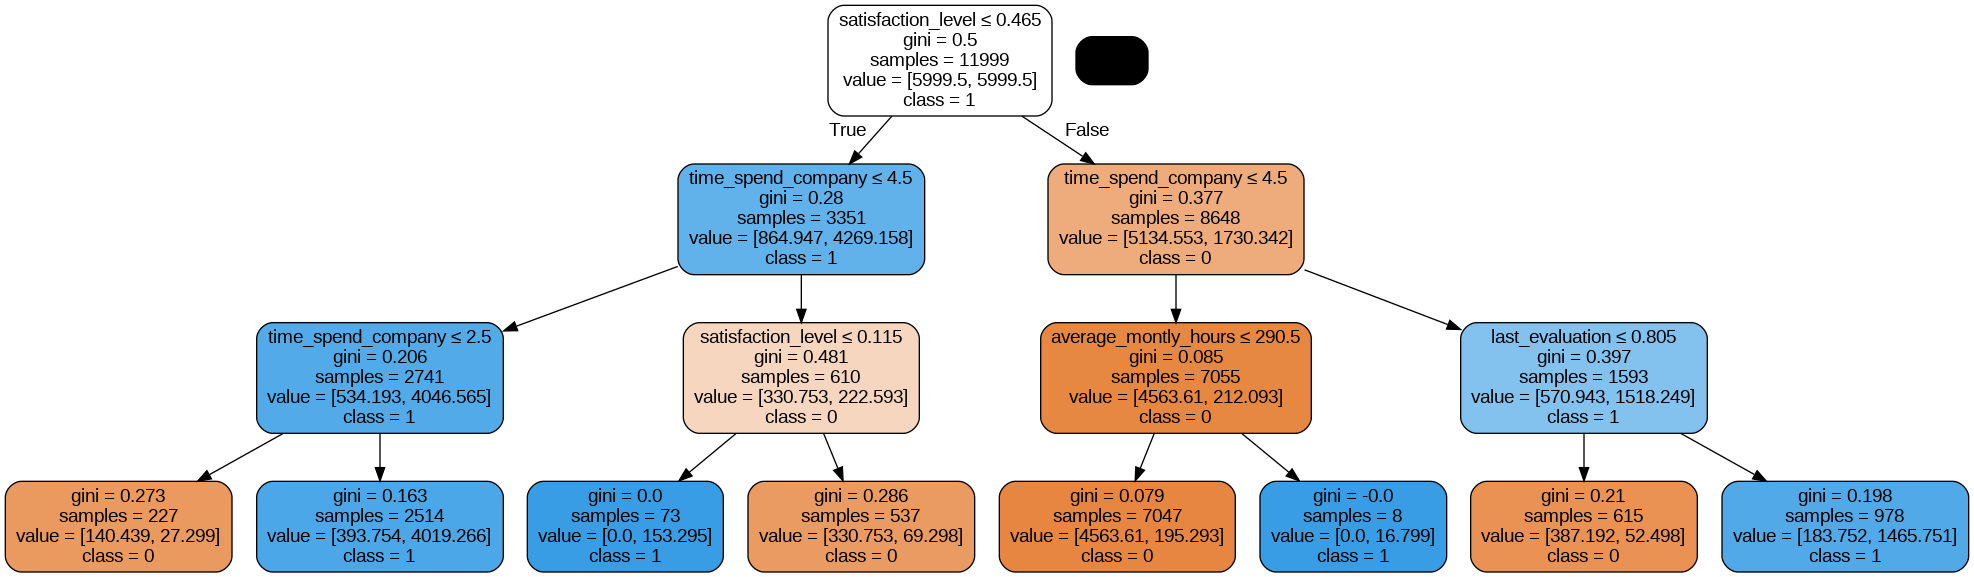

In [41]:
# Definimos el modelo
clf_tree = tree.DecisionTreeClassifier(class_weight="balanced", max_depth=3)
clf = clf_tree.fit(X_train,y_train)

# Entrenamos el modelo con los datos de entrenamiento
clf_tree = clf_tree.fit(X_train,y_train)

# Obtenemos las predicciones para el conjunto de test
y_pred = clf_tree.predict(X_test)

print(f'Classification report:\n\n{classification_report(y_test, y_pred)}')

# Visualizamos el árbol

from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = X_train.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())


Vemos que el rendimiento del modelo deja mucho que desear con sólo 3 niveles, pero esta limitación de la profundidad del árbol nos da la oportunidad de tener una visión general sobre nuestro árbol.

Observando la imagen podemos ver que, por ejemplo, la variable del nodo raíz es el nivel de satisfacción laboral (satisfaction_level), lo cual indica que esta variable es muy influyente para los trabajadores al dejar o no dejar el puesto de trabajo. Además, vemos que el tiempo pasado en la empresa (time_spend_company) es otra variables muy significativa para la clasificación.

Podríamos decir que, prácticamente, sólo con la interacción de estas 2 variables, el modelo logra clasifcar los empleados.

# Fase 4: Mejora del modelo

En esta fase nos proponemos mejorar el rendimiento del modelo experimentando con las técnicas de GridSearch, Bagging y Boosting.

## Búsqueda con GridSearch

A continuación nos proponemos a mejorar el modelo aplicando técnicas búsqueda. Cómo ya sabemos mientras que Grid Search explora sistemáticamente todas las combinaciones posibles en una cuadrícula, Random Search selecciona combinaciones de forma aleatoria dentro de un espacio de búsqueda.

En el caso presente su usará GridSearch ya que tenemos un espacio de búsqueda de hiperparámetros pequeño.

In [49]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Definir el modelo
clf = RandomForestClassifier(class_weight="balanced", n_estimators=300, max_features=5)

# Definir los rangos de valores para los hiperparámetros
grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'max_features' : [5, 8]
}

# Entrenamiento y búsqueda de parámetros con tiempos de entrenamiento
clf_cv = GridSearchCV(clf, grid, cv=4, return_train_score=True)
clf_cv.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y su puntuación
mejor_parametro = clf_cv.best_params_
mejor_puntuacion = clf_cv.best_score_

print("Mejor combinación de hiperparámetros:", mejor_parametro)
print("Puntuación del mejor modelo:", mejor_puntuacion)

# Obtener los resultados en un DataFrame
resultados = pd.DataFrame(clf_cv.cv_results_)

# Seleccionar las columnas de interés incluyendo los tiempos
columnas_interesantes = [
    'param_n_estimators',
    'param_max_depth',
    'param_max_features',
    'mean_test_score',
    'std_test_score',
    'mean_fit_time'  # Esta columna mide el tiempo promedio de entrenamiento
]

resultados = resultados[columnas_interesantes]

# Ordenar por la puntuación media en el test
resultados.sort_values(by='mean_test_score', ascending=False, inplace=True)

# Mostrar los primeros 10 resultados
resultados.head(10)

Mejor combinación de hiperparámetros: {'max_depth': 30, 'max_features': 8, 'n_estimators': 100}
Puntuación del mejor modelo: 0.9893322496387685


,param_n_estimators,param_max_depth,param_max_features,mean_test_score,std_test_score,mean_fit_time
15,100,30,8,0.989332,0.002346,1.363584
16,200,30,8,0.989332,0.002507,2.460500
11,300,20,8,0.989249,0.002466,3.723016
10,200,20,8,0.989166,0.002364,2.568318
12,100,30,5,0.989082,0.002101,0.967586
14,300,30,5,0.989082,0.002266,3.021740
17,300,30,8,0.989082,0.002254,5.059135
13,200,30,5,0.989082,0.002598,1.944100
7,200,20,5,0.988916,0.002466,1.876490
9,100,20,8,0.988832,0.002556,1.183624


Podemos observar que la combinación de parámetros que da una mejor puntuación en la precisión (mean_test_score) es:

- Mejor combinación: {'max_depth': 30, 'max_features': 8, 'n_estimators': 100}

- Puntuación del mejor modelo: 0.9893322496387685

- Tiempo de entrenamiento: 1.363584s

Además vemos que el tiempo de entrenamiento es bastante bajo ya que sólo se usan 100 estimadores.

In [50]:
clf = RandomForestClassifier(class_weight="balanced", max_depth=30, n_estimators=100, max_features=8, random_state=42)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("Classification report del modelo con los mejores hiperparámetros:")
print(classification_report(y_test,y_pred))
print(f'\nLa matriz de confusión es:\n{confusion_matrix(y_test, y_pred)}')

Classification report del modelo con los mejores hiperparámetros:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2286
           1       0.99      0.98      0.99       714

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000


La matriz de confusión es:
[[2281    5]
 [  14  700]]


Cómo vemos el rendimiento del modelo es ligeramente mejor con los hiperparámetros óptimos encontrados con el GridSearch.


## Modelo de tipo Bagging

Ahora vamos a usar la técnica de Bagging, la cual mejora la precisión al entrenar múltiples modelos en paralelo y para luego combinar sus predicciones.

In [21]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Instanciamos el modelo con los hiperparámetros más adecuados
clf = RandomForestClassifier(max_features=5, n_estimators=100, class_weight="balanced")

# Medimos el tiempo antes de entrenar el modelo
start_time = time.time()

# Entrenamos el modelo
clf.fit(X_train, y_train)

# Medimos el tiempo después de entrenar el modelo
end_time = time.time()

# Calculamos el tiempo de entrenamiento
training_time = end_time - start_time
print(f"Tiempo de entrenamiento: {training_time:.2f} segundos")

# Obtenemos las predicciones para el conjunto de test
y_pred = clf.predict(X_test)

# Evaluamos la capacidad predictiva del modelo
print("\nClassification report del modelo Bagging:")
print(classification_report(y_test, y_pred))
print(f'\nLa matriz de confusión del modelo Bagging es:\n{confusion_matrix(y_test, y_pred)}')

Tiempo de entrenamiento: 1.14 segundos

Classification report del modelo Bagging:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2286
           1       0.99      0.98      0.99       714

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000


La matriz de confusión del modelo Bagging es:
[[2280    6]
 [  13  701]]


Vevmos que el rendimiento del modelo aún ha mejorado un poco más repecto al modelo con los hiperparámetros óptimos encontrados con GridSearch.

## Modelo de tipo Boosting

Vamos a probar con la técnica de Boosting, la cual entrena modelos en serie, con cada modelo intentando corregir los errores del anterior.

In [39]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

#Definimos el modelo
bdt=AdaBoostClassifier(DecisionTreeClassifier(max_depth=5, class_weight="balanced"),
                            n_estimators=500,learning_rate=0.5)

# Entrenamos el modelo con los datos de entrenamiento
bdt.fit(X_train,y_train)

# Obtenemos las predicciones para el conjunto de test
y_pred_b1=bdt.predict(X_test)

# Evaluar la capacidad predictiva del modelo
print("Classification report del modelo Boosting:")
print(classification_report(y_test,y_pred_b1))
print(f'\nLa matriz de confusión del modelo Boosting es:\n{confusion_matrix(y_test, y_pred)}')

Classification report del modelo Boosting:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.98      0.98      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000


La matriz de confusión del modelo Boosting es:
[[2282    4]
 [  13  701]]


Vemos que el modelo Boosting tiene una capacidad de predicción idéntica, pero que su tiempo de entrenamiento es significativamente mayor, por lo cual nos quedamos con el modelo Bagging.